In [89]:
import prophet
from prophet import Prophet
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [15]:
tsv_file_path = '/Users/garrisonwinter/Downloads/CTDC_synthetic_20210825.tsv'
with open(tsv_file_path, 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    tsv_data = list(reader)

In [156]:
df = pd.DataFrame(tsv_data)
df = pd.DataFrame(df.values[1:], columns=df.iloc[0])
df = df.reset_index(drop=True)
df = df.replace("", np.nan)
df = df.dropna(subset=['yearOfRegistration',])
df.reset_index(inplace=True,drop=True)
df = df.loc[df.gender == 'Male']
counts = df['yearOfRegistration'].value_counts()
initaldf = pd.DataFrame(counts)
initaldf.reset_index(inplace=True)
initaldf.columns = ['ds', 'y']

In [157]:
from datetime import datetime
from datetime import timedelta
def convert_date(date_str):
    
    if date_str.month == 12 and date_str.day == 31:
        new_date = date_str + timedelta(days=1)
        new_date_str = new_date.strftime('%Y-%m-%d')
    else:
        new_date_str = date_str
    
    return new_date_str

In [158]:
m = Prophet()
m.fit(initaldf)
future = m.make_future_dataframe(periods=2, freq="Y")
forecast = m.predict(future)
forecast['ds'] = forecast['ds'].apply(convert_date)

16:43:17 - cmdstanpy - INFO - Chain [1] start processing
16:43:17 - cmdstanpy - INFO - Chain [1] done processing


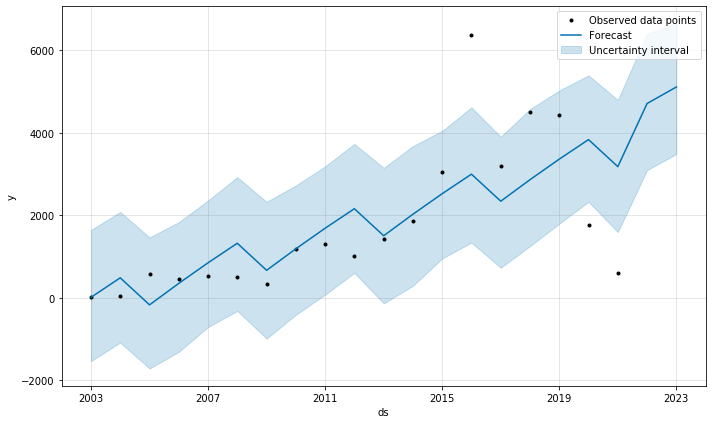

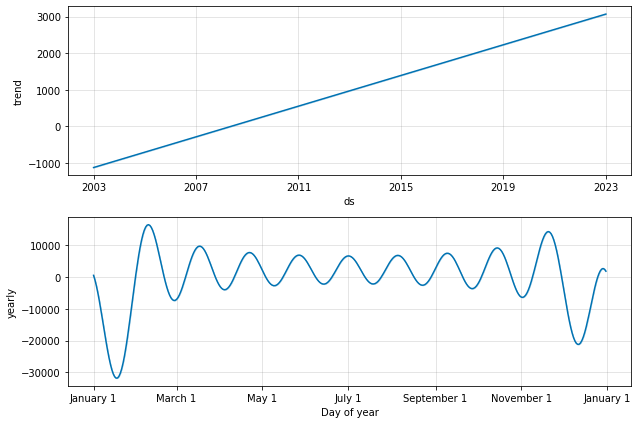

In [177]:
fig1 = m.plot(forecast)
ax = fig1.gca()
ax.legend()
plt.show()

fig2 = m.plot_components(forecast)

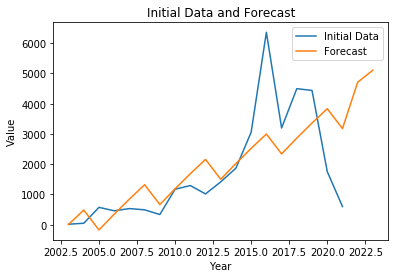

In [159]:
initaldf['ds'] = pd.to_datetime(initaldf['ds'])
initaldf['year'] = initaldf['ds'].dt.year
forecast['year'] = forecast['ds'].dt.year
combined_df = pd.merge(forecast, initaldf, on='year', how='left')
combined_df = combined_df.sort_values('ds_x')

# Plot the combined data
plt.plot(combined_df['year'], combined_df['y'], label='Initial Data')
plt.plot(combined_df['year'], combined_df['yhat'], label='Forecast')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Initial Data and Forecast')
plt.legend()
plt.show()

In [161]:
import seaborn as sns

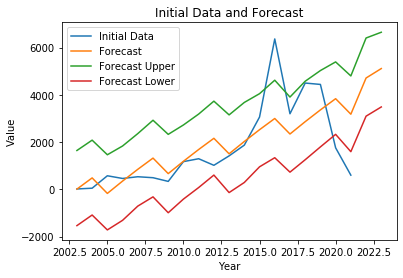

In [181]:
# Plot the combined data
sns.lineplot(data=combined_df, x='year', y='y', label='Initial Data')
sns.lineplot(data=forecast, x='year', y='yhat', label='Forecast')
sns.lineplot(data=forecast, x='year', y='yhat_upper', label='Forecast Upper')
sns.lineplot(data=forecast, x='year', y='yhat_lower', label='Forecast Lower')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Initial Data and Forecast')
plt.legend()
plt.show()